<a href="https://colab.research.google.com/github/NileshCT/CNN-Implementation/blob/main/CNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load dataset**

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test) =load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 1)
(10000, 32, 32, 3)


In [ ]:
import matplotlib.pyplot as plt
def show_img(X_train,class_names,y_train,nb_samples=12,nb_row=4):
  plt.figure(figsize=(12,12))
  for i in range(nb_samples):
    plt.subplot(nb_row,nb_row,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
  plt.show()


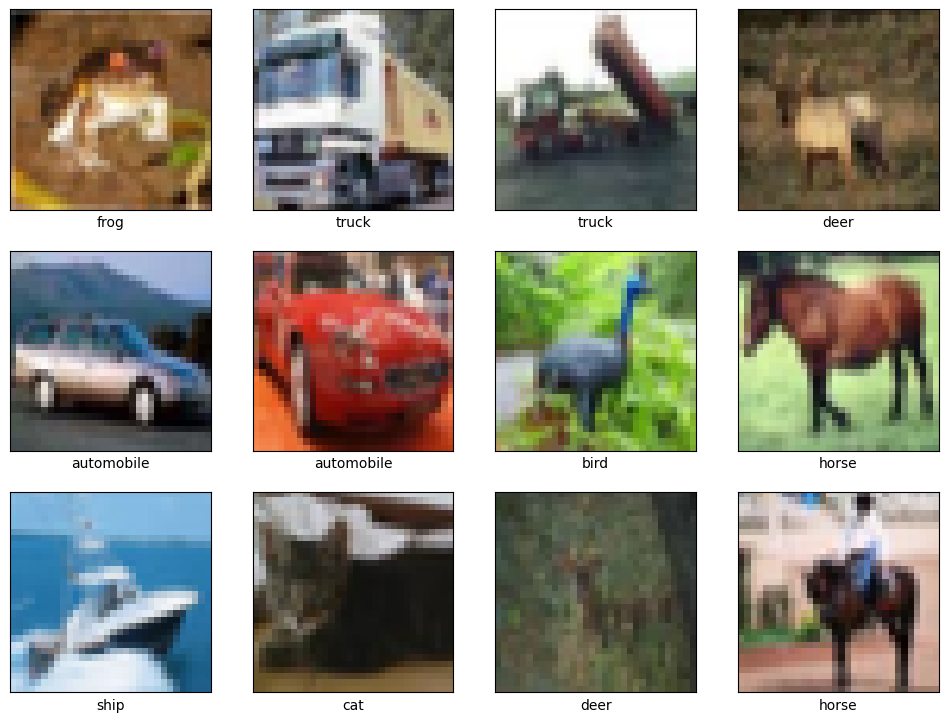

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
show_img(X_train,class_names,y_train)

# **Data preprocessing**
Prior to training the model, we need to normalize the pixel values of the data in the same range (e.g. 0 to 1). This is a common preprocessing step when dealing with images to ensure scale invariance, and faster convergence during the training

In [ ]:
max_pixel_value = 255

X_train = X_train/ max_pixel_value
X_test = X_test / max_pixel_value

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train= to_categorical(y_train, len(class_names))
y_test = to_categorical(y_test, len(class_names))



In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

In [ ]:
model=Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# **model training**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 1

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(X_train, y_train,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(X_test, y_test))

1563/1563 [==============================] - 84s 53ms/step - loss: 1.4124 - accuracy: 0.4944 - precision: 0.7142 - recall: 0.2740 - val_loss: 1.1757 - val_accuracy: 0.5790 - val_precision: 0.7282 - val_recall: 0.4238


In [ ]:
import numpy as np

313/313 [==============================] - 4s 12ms/step


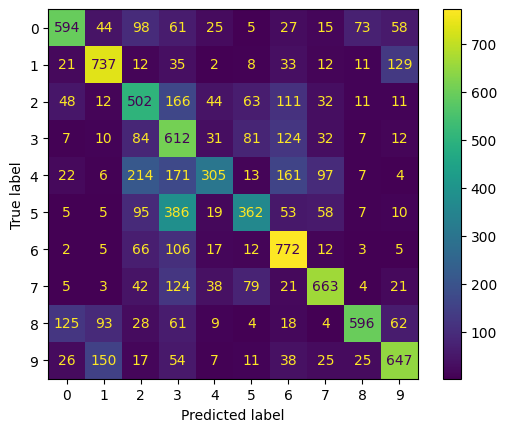

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(X_test)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [ ]:
test_true_labels.shape

(10000,)

In [ ]:
test_predicted_labels.shape

(10000,)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
test_predictions

array([[2.60567083e-03, 5.29160083e-04, 4.14902121e-02, ...,
        1.50346011e-03, 1.34816719e-02, 3.76836397e-03],
       [1.23364240e-01, 5.77809751e-01, 4.07010666e-04, ...,
        2.10788658e-05, 2.49441877e-01, 4.80855592e-02],
       [9.32900906e-02, 5.59847414e-01, 6.07781904e-03, ...,
        1.45961647e-03, 2.15893015e-01, 1.10245958e-01],
       ...,
       [7.11748580e-05, 3.20944855e-05, 1.15570553e-01, ...,
        8.39142408e-03, 8.44043898e-05, 3.83926061e-04],
       [4.74721640e-02, 2.62223959e-01, 3.98086794e-02, ...,
        1.01194605e-02, 4.41885728e-04, 4.72831819e-03],
       [5.51260018e-04, 3.10513773e-04, 4.98082303e-03, ...,
        9.13709342e-01, 6.65237967e-05, 1.62446022e-03]], dtype=float32)